## Problem Statement

Perform EDA and extract insights to explain the 15% attrition the in the company

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [4]:
dataset_path = Path("./data.csv")

df = pd.read_csv(dataset_path)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
print(f'Data lost is: {((df.shape[0] - df.dropna().shape[0])*100)/df.shape[0]:.2f}%')
df = df.dropna()

# No duplicats found
print(df[df.duplicated()].shape)

Data lost is: 2.49%
(0, 29)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   BusinessTravel           4300 non-null   object 
 4   Department               4300 non-null   object 
 5   DistanceFromHome         4300 non-null   int64  
 6   Education                4300 non-null   int64  
 7   EducationField           4300 non-null   object 
 8   EmployeeCount            4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked       4300

In [7]:
print(df["EmployeeCount"].unique())
print(df["StandardHours"].unique())

[1]
[8]


In [8]:
# Dropping irrelevant features
df.drop(labels=["Over18",
                "StandardHours",
                "EmployeeCount",
                "Gender",
                "DistanceFromHome",
                "BusinessTravel",
                "StockOptionLevel"
                ],
        axis=1, inplace=True, errors="ignore")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   Department               4300 non-null   object 
 4   Education                4300 non-null   int64  
 5   EducationField           4300 non-null   object 
 6   JobLevel                 4300 non-null   int64  
 7   JobRole                  4300 non-null   object 
 8   MaritalStatus            4300 non-null   object 
 9   MonthlyIncome            4300 non-null   int64  
 10  NumCompaniesWorked       4300 non-null   float64
 11  PercentSalaryHike        4300 non-null   int64  
 12  TotalWorkingYears        4300 non-null   float64
 13  TrainingTimesLastYear    4300 non-null   int64  
 14  YearsAtCompany           4300

In [10]:
# YearsWithCurrManager and MaritalStatus will not explain the 15% attrition
df.drop(labels=["YearsWithCurrManager", "MaritalStatus"],axis=1, inplace=True)

In [11]:
min_age, max_age = df["Age"].min(), df["Age"].max()
age_groups_list = list(range(min_age, max_age+10,10))
df["Age_group"] = pd.cut(df["Age"],age_groups_list)

In [12]:
min_salary, max_salary = df["MonthlyIncome"].min(), df["MonthlyIncome"].max()
salary_groups_list = list(range(min_salary, max_salary+10000,10000))
df["salary_group"] = pd.cut(df["MonthlyIncome"],salary_groups_list)


In [13]:
def iqr_cleaning(df: pd.DataFrame, attr: str, thresh = 0) -> pd.DataFrame:
    if df[attr].dtype == np.float64 or df[attr].dtype == np.float32 or df[attr].dtype == np.int64 or df[attr].dtype == np.int32:
        q1, q2, q3 = df[attr].quantile([.25,.5,.75])
        iqr = q3 - q1
        return df[(df[attr] >= q1 - thresh * iqr) & (df[attr] <= q3 + thresh * iqr)]
    raise ValueError("attr should be of float or int dtype")


In [14]:
# iqr_cleaning(df, "TotalWorkingYears").describe()

min_work_years , max_work_years = int(df["TotalWorkingYears"].min()), int(df["TotalWorkingYears"].max())
min_cmp_years , max_cmp_years = int(df["YearsAtCompany"].min()), int(df["YearsAtCompany"].max())

In [15]:
df["working_groups"] = pd.cut(df["TotalWorkingYears"],range(min_work_years,max_work_years+5,5))
df["years_company_grps"] = pd.cut(df["YearsAtCompany"],range(min_cmp_years,max_cmp_years+5,5))

In [16]:

# pd.Series(list(map(lambda x: f'{x.left}-{x.right}', df["working_groups"])))
# list(map(lambda x: print(x),df["working_groups"].unique()))
# df["working_groups"].unique()
# df.groupby(by=["working_groups"],observed=True).count()["EmployeeID"].keys()


In [17]:
departments = df["Department"].unique()
departments.sort()
departments

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [18]:
job_roles = df["JobRole"].unique()
job_roles.sort()
job_roles

array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)

In [19]:
qualifs = df["EducationField"].unique()
qualifs.sort()
qualifs

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [20]:

leaving = df.query("Attrition == 'Yes'")

staying = df.query("Attrition == 'No'")

In [21]:

metrics_discrete = [
    "PerformanceRating",
    "JobSatisfaction",
    "JobInvolvement",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
]

metrics_contin = [
    "PercentSalaryHike",
    "NumCompaniesWorked",
    "TotalWorkingYears",
    "YearsAtCompany",
    "TrainingTimesLastYear",
    "MonthlyIncome"
]


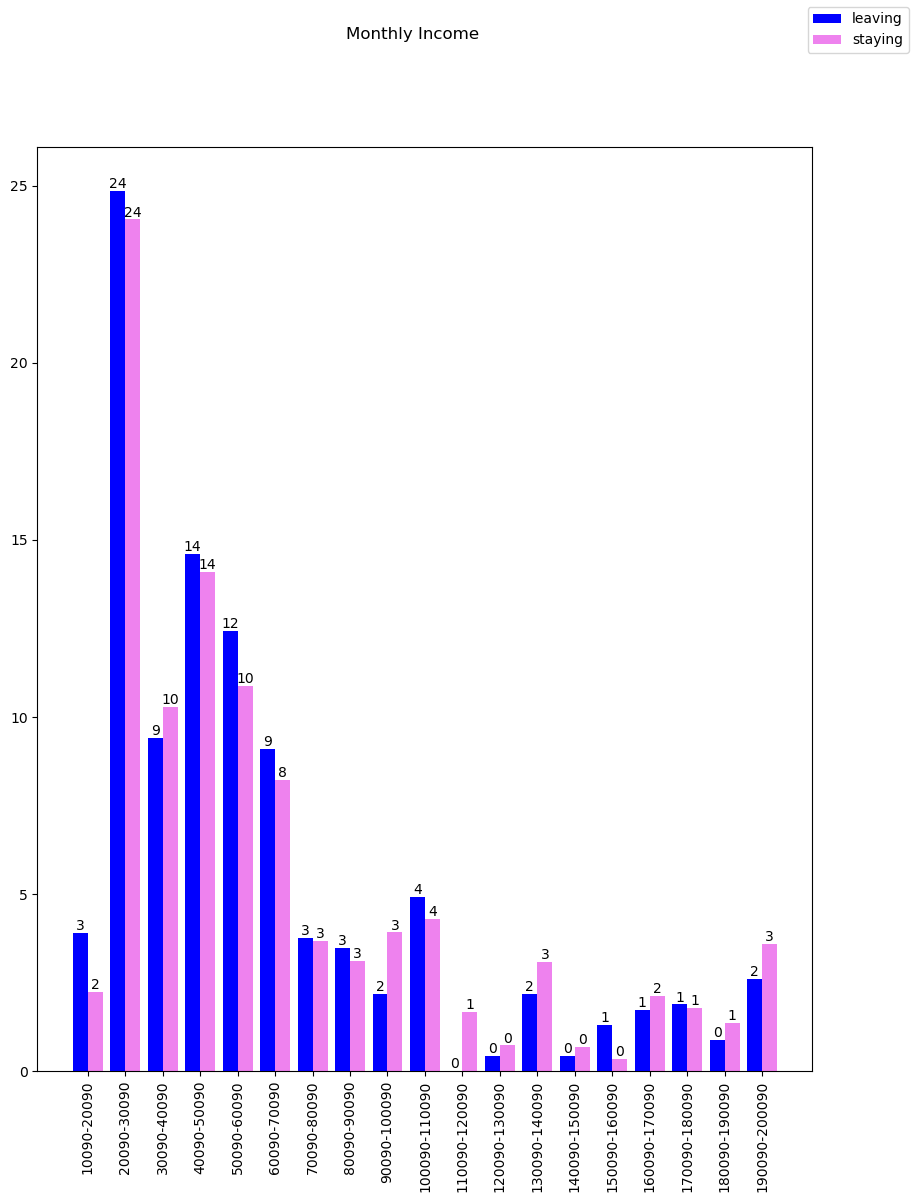

In [22]:
# years_company_grps


l = leaving.groupby(by=["salary_group"],observed=False).count()["EmployeeID"]
s = staying.groupby(by=["salary_group"],observed=False).count()["EmployeeID"]

l = l *100 / np.sum(l)
s = s * 100 / np.sum(s)

xticks = list(map(lambda x: f"{x.left}-{x.right}",l.keys()))
x_pos = np.arange(len(xticks))

fig, axs  = plt.subplots(1,1,figsize=(10,12))
bar_width = 0.4
pos = x_pos + bar_width
axs.bar(pos, l, color='blue',width=bar_width)
axs.set_xticks(x_pos + 1.5 * bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[0], fmt='%d')

pos = x_pos + 2*bar_width
axs.bar(pos, s, color='violet',width=bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[1], fmt='%d')

fig.legend(labels=["leaving", "staying"])
fig.suptitle("Monthly Income")
plt.show()


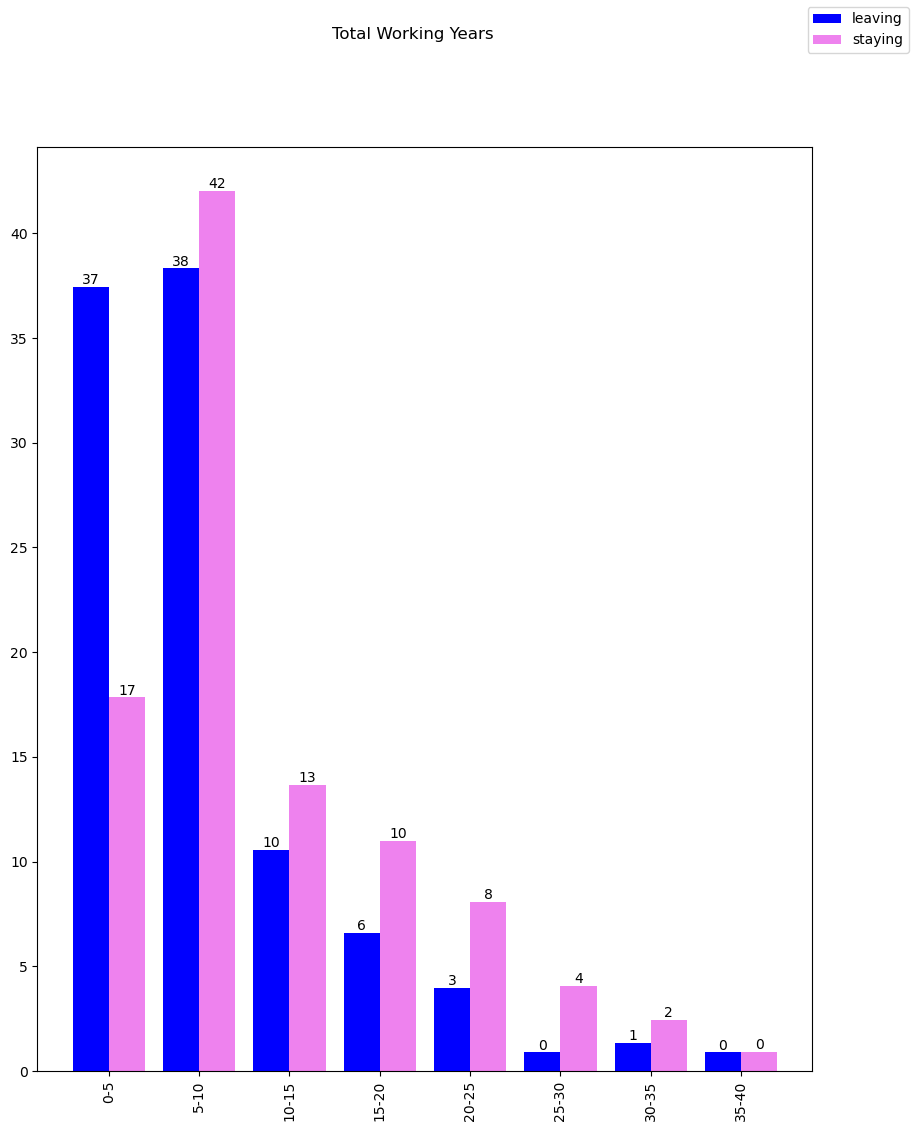

In [23]:
# years_company_grps


l = leaving.groupby(by=["working_groups"],observed=False).count()["EmployeeID"]
s = staying.groupby(by=["working_groups"],observed=False).count()["EmployeeID"]

l = l *100 / np.sum(l)
s = s * 100 / np.sum(s)

xticks = list(map(lambda x: f"{x.left}-{x.right}",l.keys()))
x_pos = np.arange(len(xticks))

fig, axs  = plt.subplots(1,1,figsize=(10,12))
bar_width = 0.4
pos = x_pos + bar_width
axs.bar(pos, l, color='blue',width=bar_width)
axs.set_xticks(x_pos + 1.5 * bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[0], fmt='%d')

pos = x_pos + 2*bar_width
axs.bar(pos, s, color='violet',width=bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[1], fmt='%d')

fig.legend(labels=["leaving", "staying"])
fig.suptitle("Total Working Years")
plt.show()


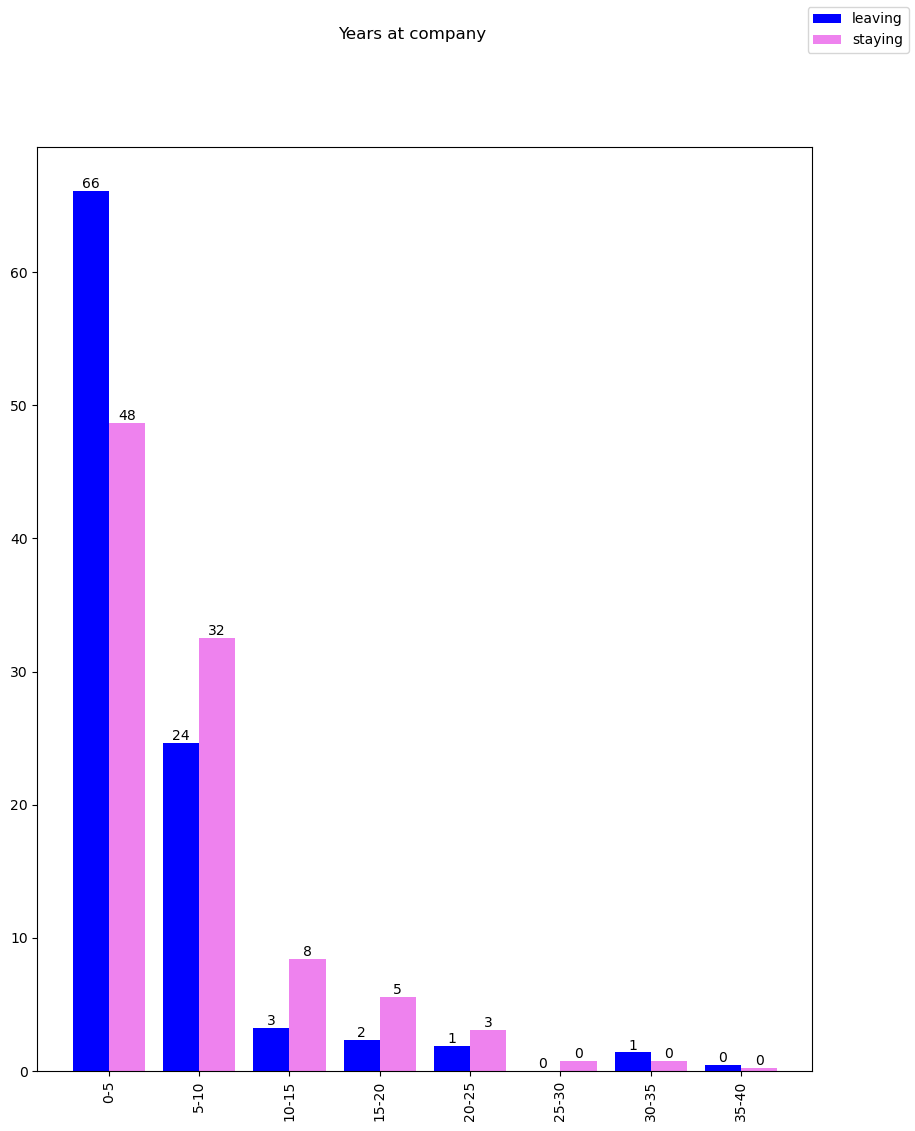

In [24]:
# years_company_grps


l = leaving.groupby(by=["years_company_grps"],observed=False).count()["EmployeeID"]
s = staying.groupby(by=["years_company_grps"],observed=False).count()["EmployeeID"]

l = l *100 / np.sum(l)
s = s * 100 / np.sum(s)

xticks = list(map(lambda x: f"{x.left}-{x.right}",l.keys()))
x_pos = np.arange(len(xticks))

fig, axs  = plt.subplots(1,1,figsize=(10,12))
bar_width = 0.4
pos = x_pos + bar_width
axs.bar(pos, l, color='blue',width=bar_width)
axs.set_xticks(x_pos + 1.5 * bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[0], fmt='%d')

pos = x_pos + 2*bar_width
axs.bar(pos, s, color='violet',width=bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[1], fmt='%d')

fig.legend(labels=["leaving", "staying"])
fig.suptitle("Years at company")
plt.show()


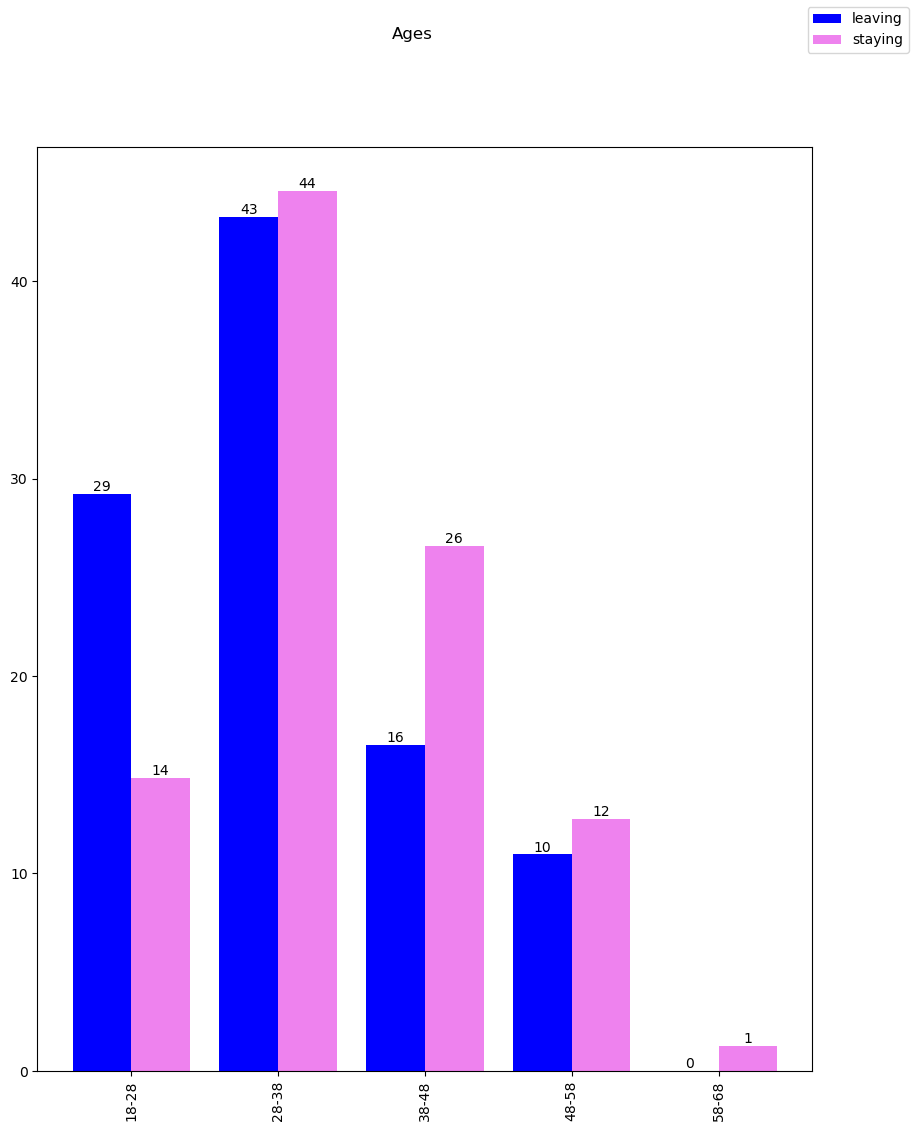

In [25]:
# years_company_grps


l = leaving.groupby(by=["Age_group"],observed=False).count()["EmployeeID"]
s = staying.groupby(by=["Age_group"],observed=False).count()["EmployeeID"]

l = l *100 / np.sum(l)
s = s * 100 / np.sum(s)

xticks = list(map(lambda x: f"{x.left}-{x.right}",l.keys()))
x_pos = np.arange(len(xticks))

fig, axs  = plt.subplots(1,1,figsize=(10,12))
bar_width = 0.4
pos = x_pos + bar_width
axs.bar(pos, l, color='blue',width=bar_width)
axs.set_xticks(x_pos + 1.5 * bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[0], fmt='%d')

pos = x_pos + 2*bar_width
axs.bar(pos, s, color='violet',width=bar_width)
axs.set_xticklabels(xticks,rotation=90)
axs.bar_label(axs.containers[1], fmt='%d')

fig.legend(labels=["leaving", "staying"])
fig.suptitle("Ages")
plt.show()


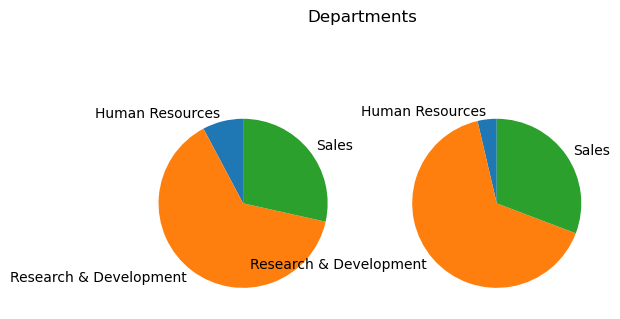

In [26]:

l = leaving.groupby(by=["Department"],observed=False).count()["EmployeeID"]
s = staying.groupby(by=["Department"],observed=False).count()["EmployeeID"]

l = l*100 / np.sum(l)
s = s*100 / np.sum(s)

fig, axs  = plt.subplots(1,2,figsize=(6,4))
# pie chart

axs[0].pie(l, labels=departments,startangle=90)
axs[1].pie(s, labels=departments,startangle=90)


fig.suptitle("Departments")
plt.show()


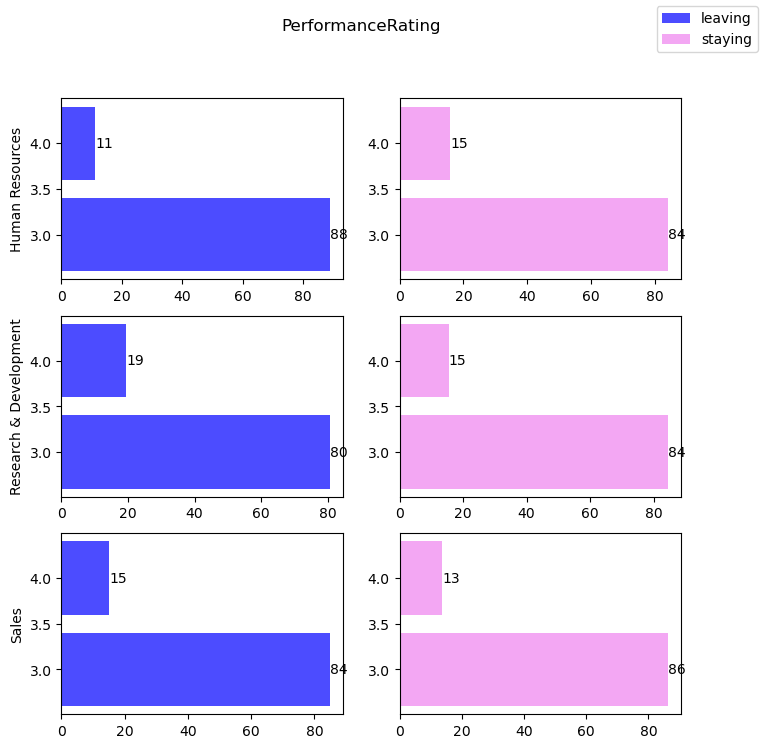

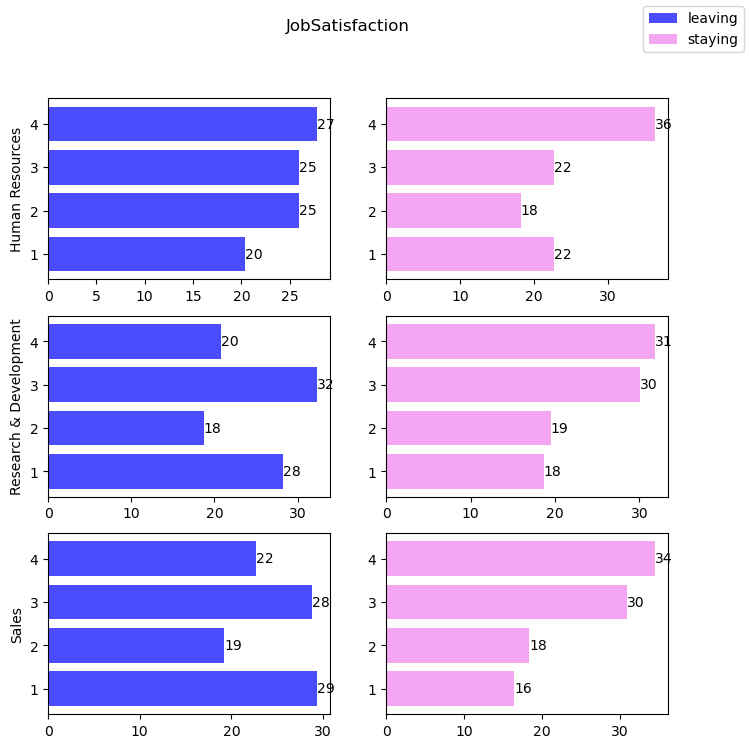

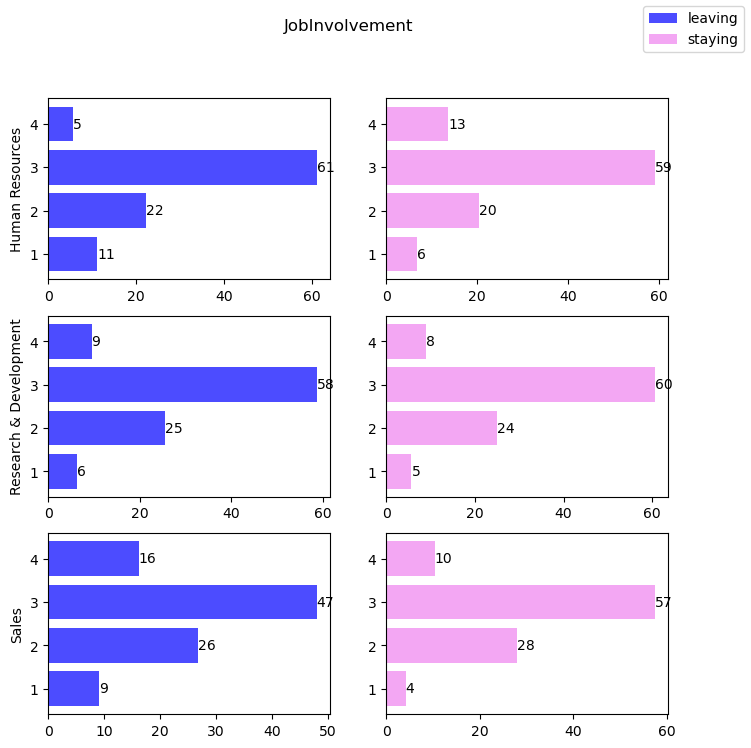

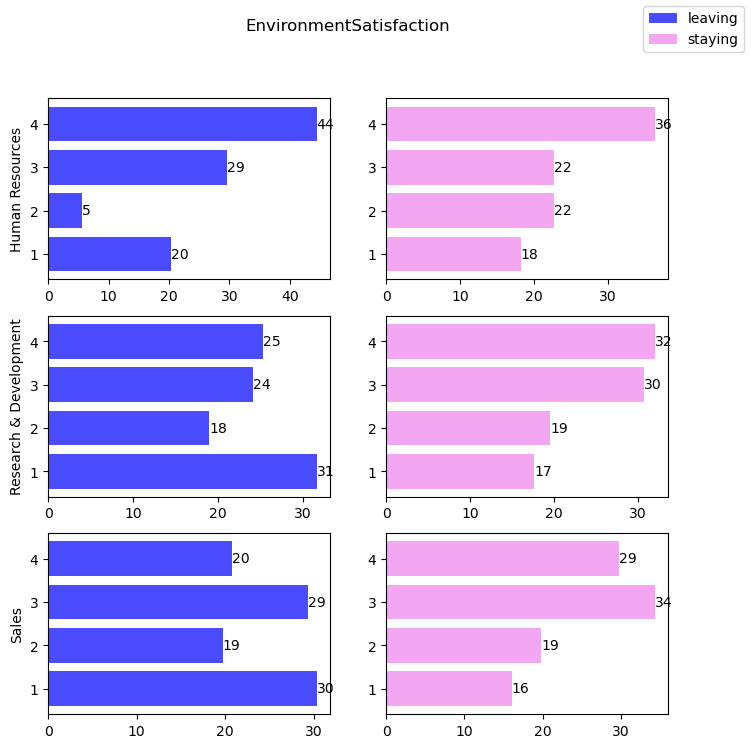

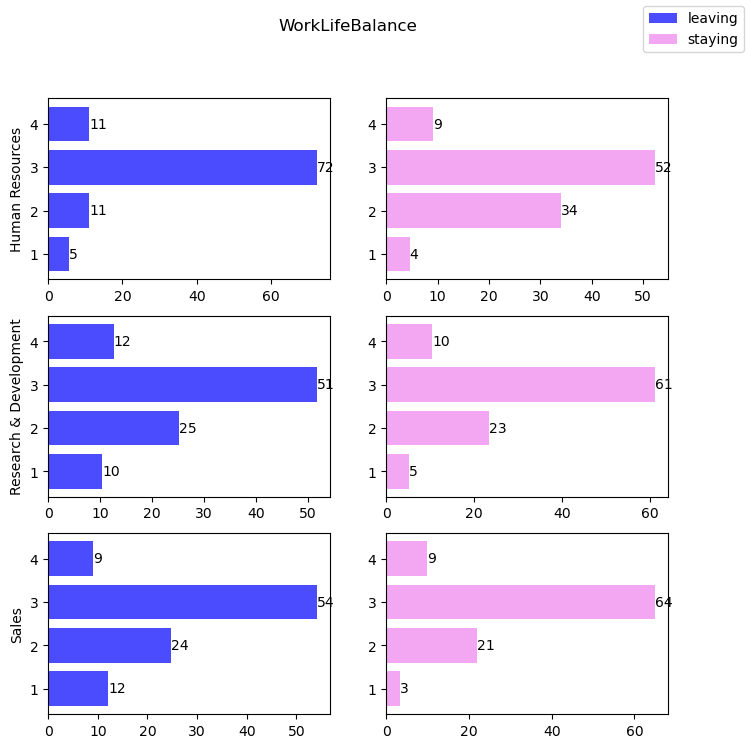

In [27]:
l1 = "Department"
idx = "EmployeeID"
depts = df[l1].sort_values().unique()

n1 = len(depts)

for l2 in metrics_discrete:

    jobsat = df[l2].sort_values().unique()

    leave_jobsat = leaving.groupby(by=[l1, l2]).count(
    )[idx].to_numpy().reshape((len(departments), len(jobsat)))
    stay_jobsat = staying.groupby(by=[l1, l2]).count(
    )[idx].to_numpy().reshape((len(departments), len(jobsat)))

    leave_jobsat_percents = (
        leave_jobsat / np.sum(leave_jobsat, axis=1).reshape((n1, 1))) * 100
    stay_jobsat_percents = (
        stay_jobsat / np.sum(stay_jobsat, axis=1).reshape((n1, 1))) * 100

    fig, axs = plt.subplots(n1, 2, figsize=(8, 8))

    for d in range(len(departments)):
        axs[d, 0].set_ylabel(departments[d])
        axs[d, 0].barh(range(int(jobsat[0]), int(jobsat[-1]+1)),
                       leave_jobsat_percents[d], color='blue', alpha=0.7)
        axs[d, 1].barh(range(int(jobsat[0]), int(jobsat[-1]+1)),
                       stay_jobsat_percents[d], color='violet', alpha=0.7)
        axs[d, 0].bar_label(axs[d, 0].containers[0],fmt='%d')
        axs[d, 1].bar_label(axs[d, 1].containers[0],fmt='%d')
    fig.legend(labels=["leaving", "staying"])
    fig.suptitle(l2)

    plt.show()

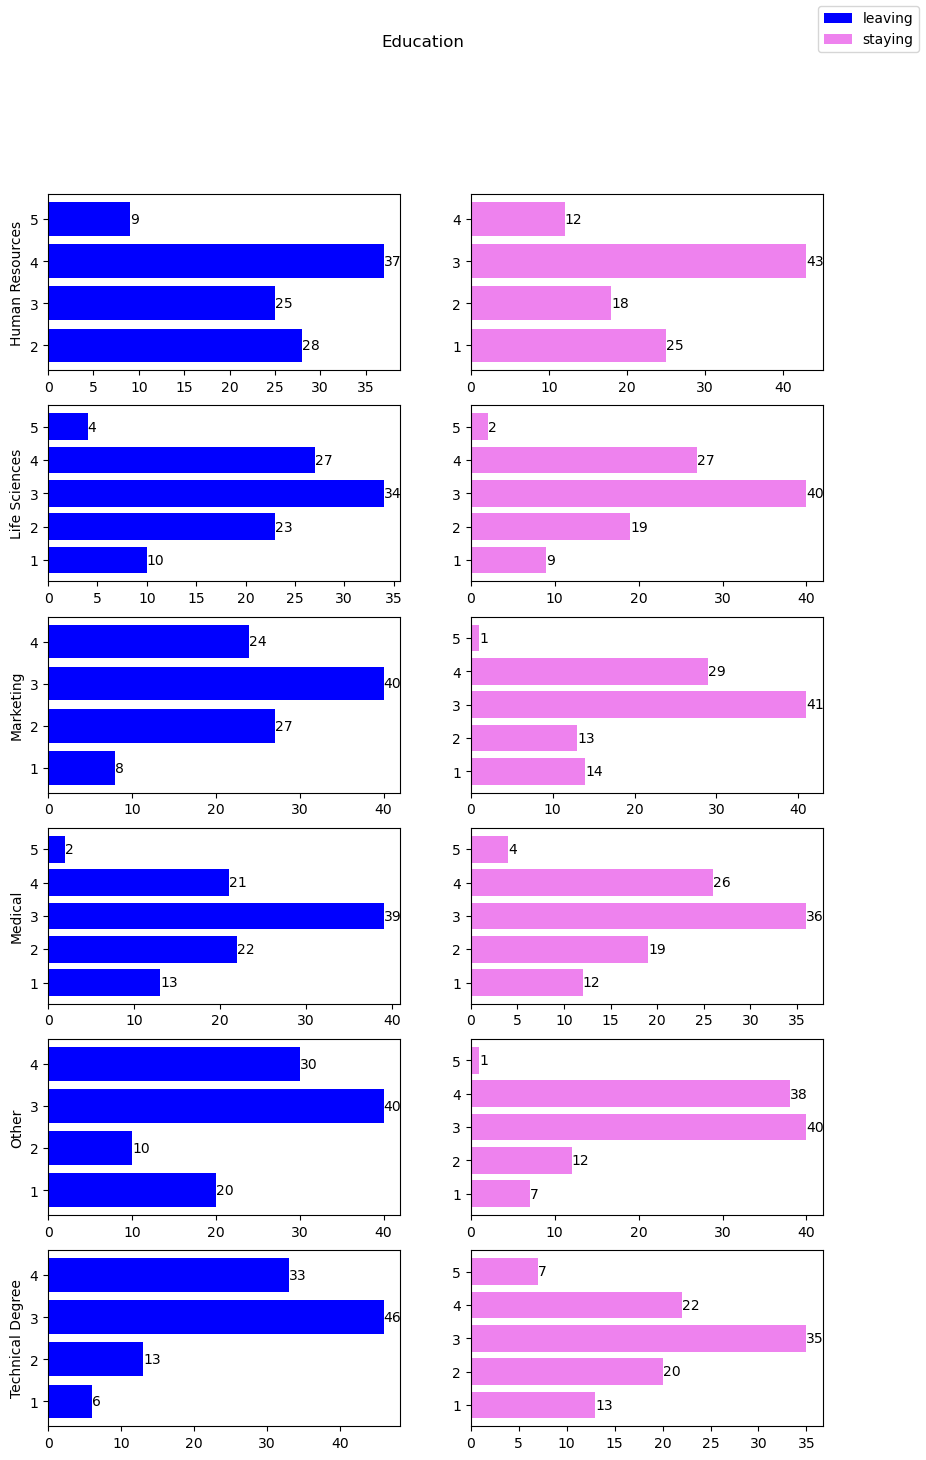

In [28]:
edu_field_l = leaving.groupby(by=["EducationField", "Education"]).count()["EmployeeID"]
edu_field_s = staying.groupby(by=["EducationField", "Education"]).count()["EmployeeID"]

fig ,axs = plt.subplots(len(qualifs),2, figsize=(10,16))
for field in range(len(qualifs)):

    edu_field_l[qualifs[field]] = np.int64(edu_field_l[qualifs[field]] * 100 / np.sum(edu_field_l[qualifs[field]]))
    edu_field_s[qualifs[field]] = np.int64(edu_field_s[qualifs[field]] * 100 / np.sum(edu_field_s[qualifs[field]]))

    axs[field , 0].barh(edu_field_l[qualifs[field]].keys(), edu_field_l[qualifs[field]],color='blue')
    axs[field , 1].barh(edu_field_s[qualifs[field]].keys(), edu_field_s[qualifs[field]], color='violet')

    axs[field, 0].bar_label(axs[field, 0].containers[0],fmt='%d')
    axs[field, 1].bar_label(axs[field, 1].containers[0],fmt='%d')
    axs[field, 0].set_ylabel(qualifs[field])

fig.suptitle("Education")
fig.legend(labels=["leaving", "staying"])
plt.show()    

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4300 non-null   int64   
 1   Age                      4300 non-null   int64   
 2   Attrition                4300 non-null   object  
 3   Department               4300 non-null   object  
 4   Education                4300 non-null   int64   
 5   EducationField           4300 non-null   object  
 6   JobLevel                 4300 non-null   int64   
 7   JobRole                  4300 non-null   object  
 8   MonthlyIncome            4300 non-null   int64   
 9   NumCompaniesWorked       4300 non-null   float64 
 10  PercentSalaryHike        4300 non-null   int64   
 11  TotalWorkingYears        4300 non-null   float64 
 12  TrainingTimesLastYear    4300 non-null   int64   
 13  YearsAtCompany           4300 non-null   int64   
 14  YearsSinceLas

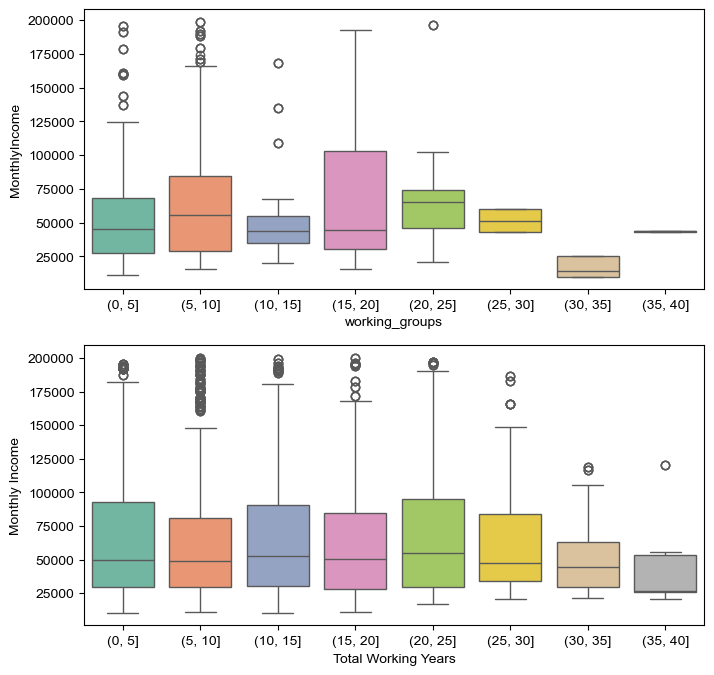

In [30]:

# Create the plot
fig, axs = plt.subplots(2,1,figsize=(8,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x="working_groups",hue="working_groups", y="MonthlyIncome", data=leaving, palette="Set2",ax=axs[0],legend=False)
sns.boxplot(x="working_groups",hue="working_groups", y="MonthlyIncome", data=staying, palette="Set2",ax=axs[1],legend=False)
plt.xlabel("Total Working Years")
plt.ylabel("Monthly Income")
plt.show()

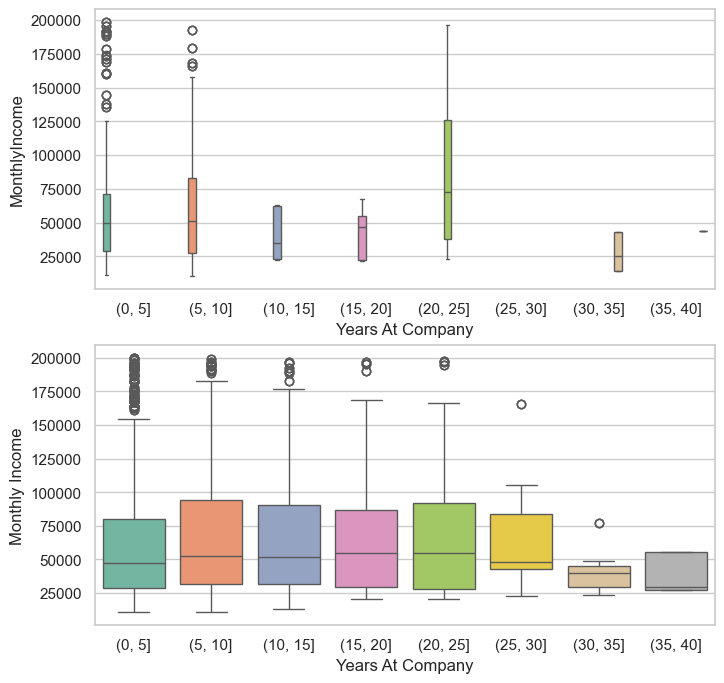

In [31]:
# years_company_grps
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x="years_company_grps",
            hue="years_company_grps",
            y="MonthlyIncome",
            data=leaving,
            palette="Set2",
            ax=axs[0],
            legend=False
            )
sns.boxplot(x="years_company_grps",
            hue="years_company_grps",
            y="MonthlyIncome",
            data=staying,
            palette="Set2",
            ax=axs[1],
            legend=False)
axs[0].set_xlabel("Years At Company")
axs[1].set_xlabel("Years At Company")
plt.ylabel("Monthly Income")
plt.show()

In [32]:

def iqr_clean_array_mean(x: pd.Series):
    
    x = x.to_numpy()
    q1 = np.quantile(x, q=.25)
    q3 = np.quantile(x, q=.75)
    iqr = q3 - q1
    thresh = 1.5

    lowerbound = q1 - thresh * iqr
    upperbound = q3 + thresh * iqr

    outliers = np.where((x < lowerbound) | (x > upperbound))[0]
    x = np.delete(x, outliers)
    return np.mean(x)



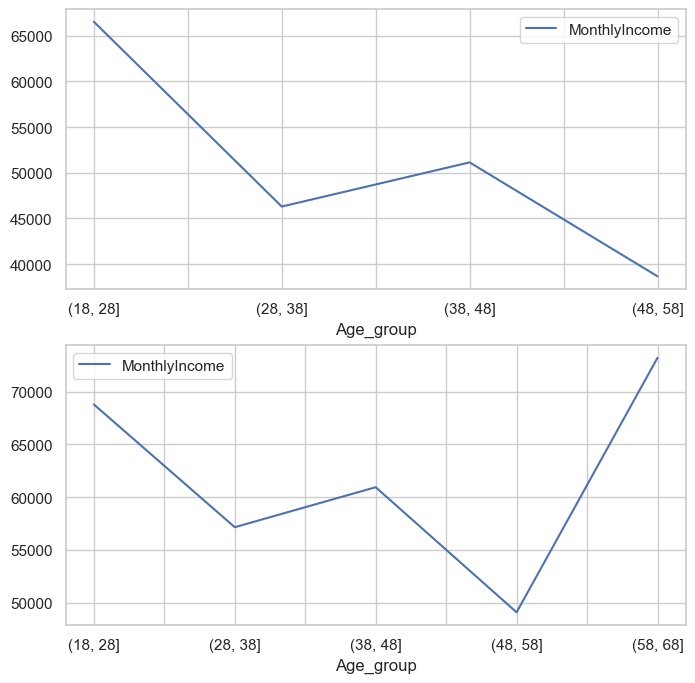

In [33]:
xattr = "Age_group"
yattr = "MonthlyIncome"
fig, axs = plt.subplots(2,1,figsize=(8,8))

leaving.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[0])

staying.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[1])

plt.show()


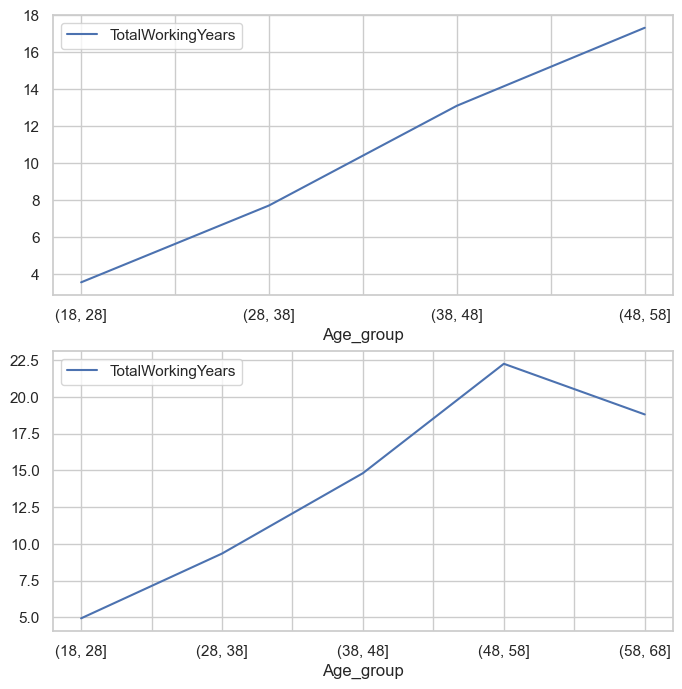

In [34]:
xattr = "Age_group"
yattr = "TotalWorkingYears"
fig, axs = plt.subplots(2,1,figsize=(8,8))

leaving.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[0])

staying.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[1])

plt.show()


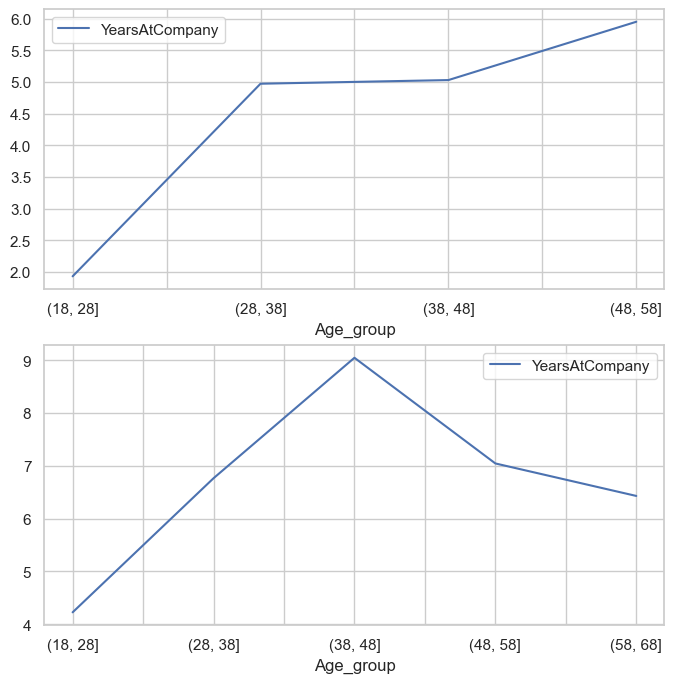

In [35]:
xattr = "Age_group"
yattr = "YearsAtCompany"
fig, axs = plt.subplots(2,1,figsize=(8,8))

leaving.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[0])

staying.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[1])

plt.show()


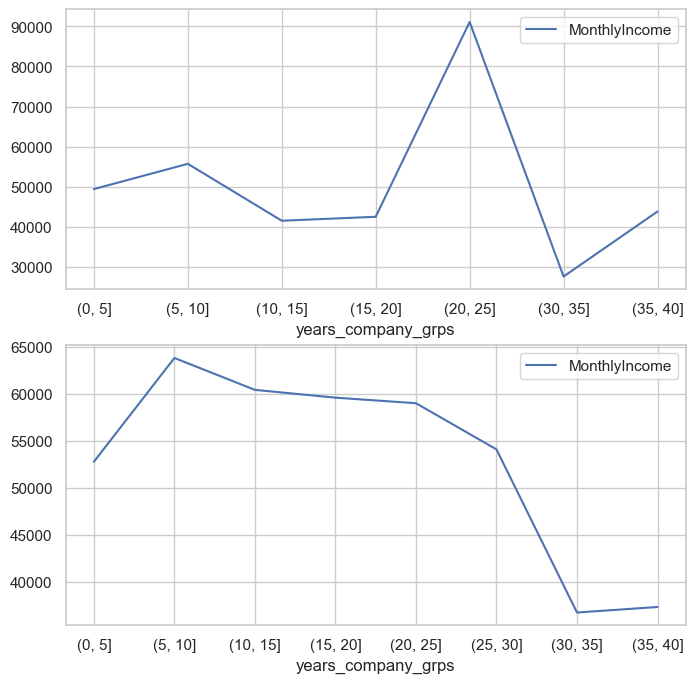

In [36]:
xattr = "years_company_grps"
yattr = "MonthlyIncome"
fig, axs = plt.subplots(2,1,figsize=(8,8))

leaving.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[0])

staying.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[1])

plt.show()


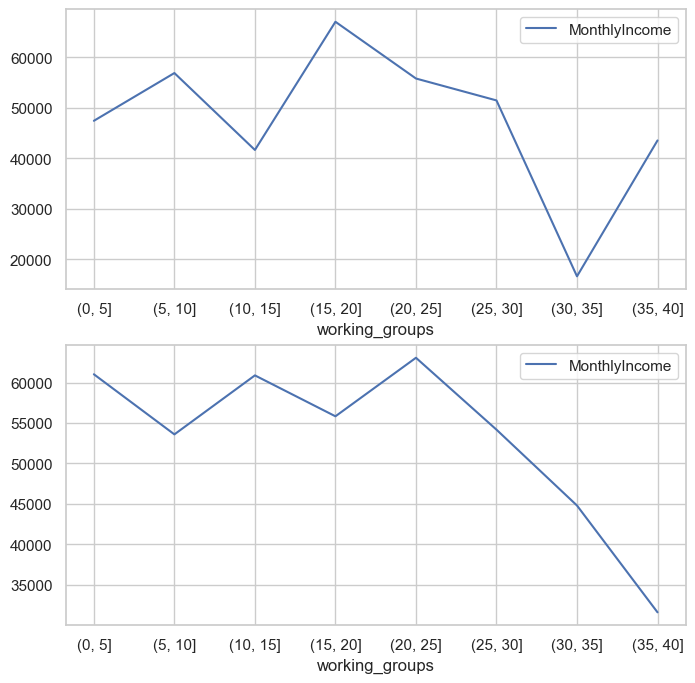

In [37]:
xattr = "working_groups"
yattr = "MonthlyIncome"
fig, axs = plt.subplots(2,1,figsize=(8,8))

leaving.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[0])

staying.groupby(by=[xattr],observed=True).agg({yattr: iqr_clean_array_mean}).plot(y=yattr,ax=axs[1])

plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4300 non-null   int64   
 1   Age                      4300 non-null   int64   
 2   Attrition                4300 non-null   object  
 3   Department               4300 non-null   object  
 4   Education                4300 non-null   int64   
 5   EducationField           4300 non-null   object  
 6   JobLevel                 4300 non-null   int64   
 7   JobRole                  4300 non-null   object  
 8   MonthlyIncome            4300 non-null   int64   
 9   NumCompaniesWorked       4300 non-null   float64 
 10  PercentSalaryHike        4300 non-null   int64   
 11  TotalWorkingYears        4300 non-null   float64 
 12  TrainingTimesLastYear    4300 non-null   int64   
 13  YearsAtCompany           4300 non-null   int64   
 14  YearsSinceLas

In [39]:
import plotly.graph_objects as go

depts = df["Department"].unique()
depts.sort()


l_values = leaving.groupby(by=["Department"]).count()["EmployeeID"].to_numpy()
s_values = staying.groupby(by=["Department"]).count()["EmployeeID"].to_numpy()

fig = go.Figure(data=
                [go.Table(header=dict(values=["Department", "Leaving", "Staying"]),
                          cells=dict(values=[depts, l_values, s_values]))
                ])
fig.show()
